In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\VIREN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
mydata=pd.read_csv(r"C:\Users\VIREN\Downloads\BMI555IEE520Fall2018train.csv",header=0)
mydata_test =pd.read_csv(r"C:\Users\VIREN\Downloads\BMI555IEE520Fall2018Test.csv")

categorical_cols=mydata.select_dtypes(include=['object']).columns
# print(categorical_cols)
cat =[4,12,63,64]
# Importing testing data set
train=mydata.iloc[:,:].values

train=np.delete(train,2500,axis=0)

train_X = train[:,1:67]
Y = train[:,67].astype(int)
Y =pd.DataFrame(Y)

test = mydata_test.iloc[:,:].values
test_X = test[:,1:67]
test_Y = test[:,67]
test_X = pd.DataFrame(test_X)

test_Xd = pd.get_dummies(test_X,columns=cat,dtype=float) #Create Dummies from Categorical variables for Test Dataset

train_Xd = pd.DataFrame(train_X)
X = pd.get_dummies(train_Xd,columns=cat,dtype=float) #Create Dummies from Categorical variables for Train Dataset
X = np.asarray(X,dtype=float)
X = pd.DataFrame(X)

New_Sampled_Data = pd.concat([X,Y],axis=1)
New_Sampled_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,0
0,27.0,1.0,1.0,1.0,18.0,3.0,1.0,28.0,119.9,154.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,30.0,0.0,1.0,1.0,18.0,13.0,3.0,19.0,86.7,132.9,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1
2,37.0,0.0,1.0,1.0,1.0,3.0,14.0,33.0,174.0,128.1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
3,29.0,0.0,1.0,1.0,14.0,9.0,3.0,29.0,8.8,126.8,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1
4,33.0,1.0,1.0,0.0,2.0,15.0,12.0,39.0,55.0,187.6,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1


In [28]:
h = .02 # step size in the mesh
names = ["Decision Tree","Random Forest", "AdaBoost"]
classifiers = [
DecisionTreeClassifier(max_depth=5),
RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
AdaBoostClassifier()]

# X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
# random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, Y)


In [29]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
# for ds in datasets:
# preprocess dataset, split into training and test part

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# # just plot the dataset first
# cm = plt.cm.RdBu
# cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# ax = plt.subplot(len(New_Sampled_Data), len(classifiers) + 1, i)
# # Plot the training points
# ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# # and testing points
# ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())
# ax.set_xticks(())
# ax.set_yticks(())
i += 1
# iterate over

<Figure size 1944x648 with 0 Axes>

In [33]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# cont = [0,1,4,5,6,7,8,9,x12,x16,x29,x32,x34,x38,x44]
# import smote
sm = SMOTE(ratio = 'minority',random_state=42,k_neighbors=10,kind='borderline1',m_neighbors=5)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

C:\Users\VIREN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree 0.621
Accuracy: 62.10%
Random Forest 0.629
Accuracy: 62.90%


C:\Users\VIREN\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\VIREN\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


AdaBoost 0.713
Accuracy: 71.30%


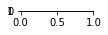

In [38]:
from sklearn.metrics import accuracy_score
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(New_Sampled_Data), len(classifiers) + 1, i)

    clf.fit(X_train_sm, y_train_sm)
    score = clf.score(X_test, y_test)
    print(name,score)
    
    y_pred_smote = clf.predict(X_test) 
    y_pred_smote = np.ravel(y_pred_smote)

    
    accuracy = accuracy_score(y_test,y_pred_smote )
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
#     if hasattr(clf, "decision_function"):
#         Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     else:
#         Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# # Plot also the training points
#         ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# # and testing points
#         ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,alpha=0.6)
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())

In [31]:
score

0.767